# 使用sklearn的逻辑回归接口实现MNIST分类

In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [2]:
t0 = time.time()
train_samples = 5000

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
x = X.reshape((X.shape[0], -1))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=10000)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
clf = LogisticRegression(C=50. / train_samples, multi_class='multinomial', penalty='l1',
                         solver='saga', tol=0.1)
clf.fit(x_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(x_test, y_test)

In [7]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()


<Figure size 720x360 with 0 Axes>

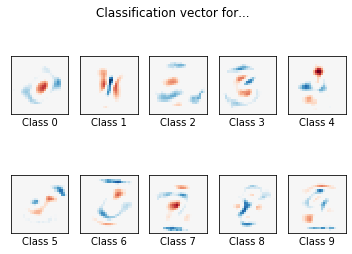

Sparsity with L1 penalty: 80.64%
Test score with L1 penalty: 0.8271
Example run in 33.563 s


In [8]:
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)

plt.suptitle('Classification vector for...')
plt.show()
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)